**DATA IMPORTATION**


Dataframe description

Feature	Description


Age	The age of the individual in years.

Sex	The gender of the individual, which can be either 'male' or 'female'.

Bmi	Body Mass Index (BMI) of the individual, a measure of body fat based on height and weight.

Steps	The number of steps taken by the individual.

Children	The number of children/dependents covered by the insurance.
smoker	Indicates whether the individual is a smoker ('yes') or non-smoker ('no').

Region	The region where the individual resides, which can be 'northeast', 'northwest', 'southeast', or 'southwest'.

Insurance_claim	Indicates whether the individual has made an insurance claim ('yes') or not ('no').

Claim_amount	The amount of money claimed by the individual through insurance, expressed in monetary units.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('claims_data.csv')
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


DATA PROFILING

In [ ]:
obese_df = df[df['bmi'] >25]
total_obese =len(obese_df)
total_patients = len(df)

percentage_obese_patients = (total_obese/total_patients)*100
print(percentage_obese_patients)

81.53961136023916


In [ ]:
df.describe()

,age,bmi,steps,children,claim_amount
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,9611.312287
std,14.049960,6.098187,2453.643236,1.205493,13450.624483
min,18.000000,15.960000,3000.000000,0.000000,0.000000
25%,27.000000,26.296250,3008.000000,0.000000,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,2748.484475
75%,51.000000,34.693750,8004.000000,2.000000,13045.979513
max,64.000000,53.130000,10010.000000,5.000000,63770.428010


In [ ]:

children = df['children']
mean = children.mean()
print(mean)
variance=children.var()
print(variance)
#this suggests that Possion is not a good distributio

1.0949177877429
1.453212745666905


In [ ]:


import scipy.stats
from scipy.stats import norm
z_score = (60-df['age'].mean())/df['age'].std()
print(z_score)
cumulative_prob = norm.cdf(z_score)
cumulative_prob

1.4799311903895027


0.9305541945678477

In [ ]:
#compare this with the number actually aged 60 or older.
len(df[df['age']>=60]) - (cumulative_prob*100)

20.944580543215224

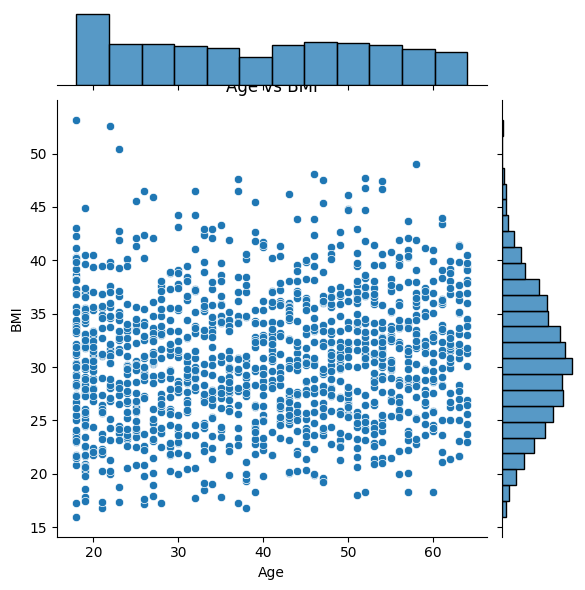

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.jointplot(x='age',y='bmi',data=df)
plt.title ('Age vs BMI')
plt.ylabel ('BMI')
plt.xlabel ('Age')
plt.show()

In [ ]:
correlation_matrix = np.corrcoef(df['age'], df['bmi'])
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient:", correlation_coefficient)


Correlation coefficient: 0.1092718815485352


DATA MODELING WITH LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Use 'insurance_claim' instead of 'insurance claim'
y = df['insurance_claim']
X= df.drop(columns = ['insurance_claim', 'claim_amount'])


#create dummy variables for the categorical variables in the data, dropping the first in each instance
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Convert your target variable to a binary 0 or 1

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8246268656716418
Confusion Matrix:
 [[ 80  27]
 [ 20 141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       107
           1       0.84      0.88      0.86       161

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

# Load your data (assuming df is your DataFrame)
X = df.drop(columns=['insurance_claim', 'claim_amount'])
y = df['insurance_claim']

# Convert the target variable to binary numeric
y = y.map({'yes': 1, 'no': 0})

# Create dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all feature columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the dataset ensuring both classes are present
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

# Add constant to the feature matrices
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Check and handle any non-numeric values
print(np.isinf(X_train_sm).any())
print(np.isnan(X_train_sm).any())

# Replace or remove infinite values and NaNs
X_train_sm = np.nan_to_num(X_train_sm, nan=0, posinf=0, neginf=0)

# Ensure data types are correct
X_train_sm = X_train_sm.astype(np.float64)
y_train = y_train.astype(np.float64)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_sm)
result = model.fit()

# Print the summary of the model
print(result.summary())


const               False
age                 False
bmi                 False
steps               False
children            False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool
const               False
age                 False
bmi                 False
steps               False
children            False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool
Optimization terminated successfully.
         Current function value: 0.363766
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        insurance_claim   No. Observations:                  936
Model:                          Logit   Df Residuals:                      926
Method:                           MLE   Df Model:                            9
Date:                Wed, 31 Jul 2024 

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load your data (assuming X and y are already defined)
X = df.drop(columns=['insurance_claim', 'claim_amount'])
y = df['insurance_claim']

# Create dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset ensuring both classes are present
X_train, X_test, y

(      age     bmi  steps  children  sex_male  smoker_yes  region_northwest  \
 513    19  30.400   4004         0      True       False             False   
 1158   20  30.590   4000         0     False       False             False   
 1208   37  25.555   3006         1     False        True             False   
 867    57  43.700   4002         1      True       False             False   
 45     55  37.300   3005         0      True       False             False   
 ...   ...     ...    ...       ...       ...         ...               ...   
 238    19  29.070   4005         0      True        True              True   
 774    41  34.200   3003         2      True       False              True   
 708    31  30.495   3003         3     False       False             False   
 215    41  37.100   4004         2     False       False             False   
 1026   19  26.030   3007         1      True        True              True   
 
       region_southeast  region_southwest  
 513  

CREATING A RANDOM FOREST MODEL

In [ ]:
# fit a random forest with 100 trees and a random seed of 101

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Use 'insurance_claim' instead of 'insurance claim'
y = df['insurance_claim']
X= df.drop(columns = ['insurance_claim', 'claim_amount'])


#create dummy variables for the categorical variables in the data, dropping the first in each instance
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest Accuracy: 0.9701492537313433
Random Forest Confusion Matrix:
 [[104   3]
 [  5 156]]
Random Forest Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.97      0.96       107
         yes       0.98      0.97      0.97       161

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



**Model Selection and Explanation**

Based on the evaluation results, the Random Forest model outperforms the Logistic Regression model across all metrics, including accuracy, precision, recall, and f1-score. The Random Forest model achieved an accuracy of 0.9701, significantly higher than the Logistic Regression model's accuracy of 0.8246. Additionally, the Random Forest model has higher precision and recall values for both classes (0 and 1), indicating better performance in distinguishing between the two classes.


The decision to select the Random Forest model is based on its superior performance metrics, which suggest it is more effective at accurately predicting insurance claims in this dataset. The high accuracy and balanced precision-recall scores imply that the Random Forest model can reliably handle the classification task with fewer errors compared to the Logistic Regression model. Therefore, the Random Forest model is chosen as the preferred model for this classification problem.